#Hypothesis generation and testing:
Null Hypothesis:


In [1]:
import pandas as pd
from pandas.plotting import boxplot
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/9961_14084_bundle_archive/Train.csv'
data = pd.read_csv(train_path)

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8523, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Missing value treatment

In [7]:
nulls= data.isnull().sum()
nulls

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
new_data = data
print(new_data['Outlet_Size'].mode())

0    Medium
dtype: object


In [9]:
new_data['Outlet_Size']=new_data['Outlet_Size'].fillna('Medium')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
nulls = new_data.isnull().sum()
nulls

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
final_data=new_data
final_data['Item_Weight']=final_data['Item_Weight'].fillna(final_data['Item_Weight'].mean())
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
nulls = final_data.isnull().sum()
nulls

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Data structure and content

In [13]:
final_data.shape

(8523, 12)

In [14]:
final_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
final_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
final_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [18]:
duplicates= final_data.duplicated()
print(duplicates.sum())

0


#Exploratory data analysis

<function matplotlib.pyplot.show(close=None, block=None)>

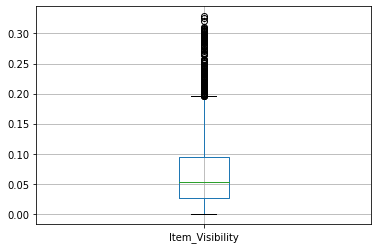

In [19]:
final_data.boxplot(column=['Item_Visibility'])
plt.show

In [20]:
def remove_outlier (col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range,upper_range

lowincome,uppincome=remove_outlier(final_data['Item_Visibility'])
final_data['Item_Visibility']=np.where(final_data['Item_Visibility']>uppincome,uppincome,final_data['Item_Visibility'])
final_data['Item_Visibility']=np.where(final_data['Item_Visibility']<lowincome,lowincome,final_data['Item_Visibility'])

<function matplotlib.pyplot.show(close=None, block=None)>

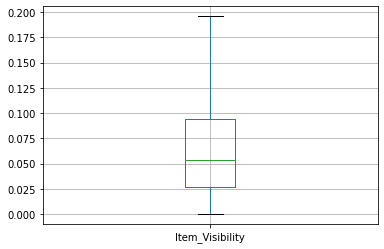

In [21]:
final_data.boxplot(column=['Item_Visibility'])
plt.show

(array([5203.,    0.,    0.,    0.,    0.,  932.,    0.,    0.,    0.,
        2388.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

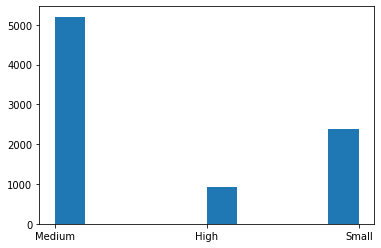

In [22]:
plt.hist(final_data['Outlet_Size'])

(array([5577.,    0.,    0.,  928.,    0.,    0., 1083.,    0.,    0.,
         935.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

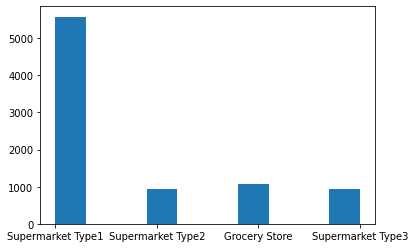

In [23]:
plt.hist(final_data['Outlet_Type'])

(array([1127.,  425., 2142.,  648., 2056.,  110.,  734.,  649.,  399.,
         233.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

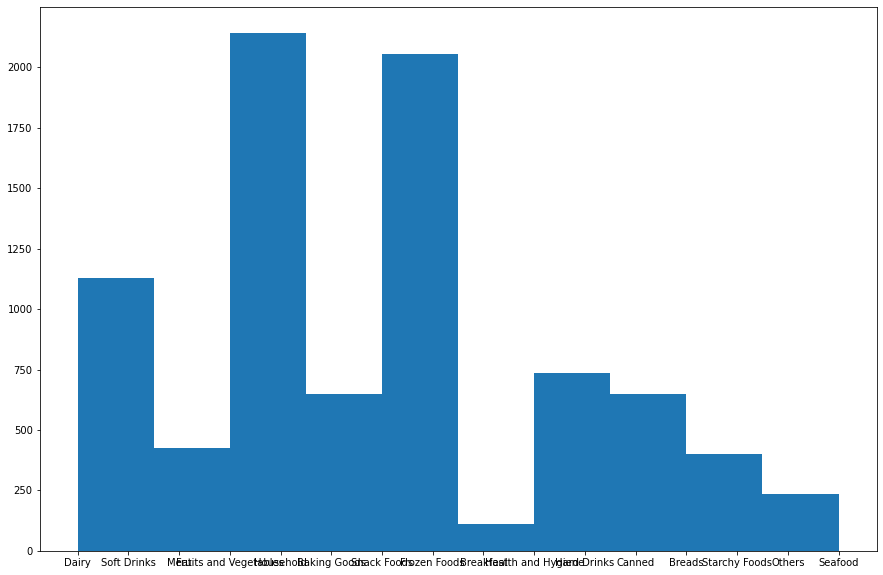

In [24]:
plt.figure(figsize=(15,10))
plt.hist(final_data['Item_Type'])

#Bivariate analysis

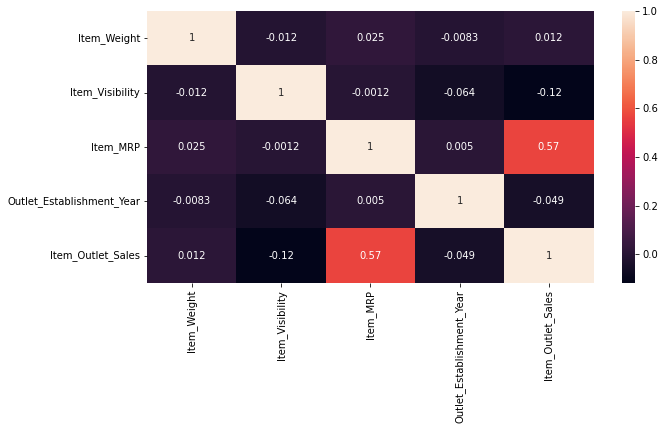

In [25]:
plt.figure(figsize=(10,5)) 
sns.heatmap(final_data.corr(),annot = True)
plt.show()

In [26]:
final_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011928,0.024756,-0.008301,0.011550
Item_Visibility,-0.011928,1.000000,-0.001163,-0.064105,-0.117918
Item_MRP,0.024756,-0.001163,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.064105,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.117918,0.567574,-0.049135,1.000000


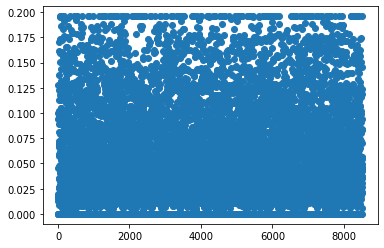

In [27]:
plt.scatter(final_data.index,final_data['Item_Visibility'])
plt.show()

Text(0, 0.5, 'Item_Outlet_Sales')

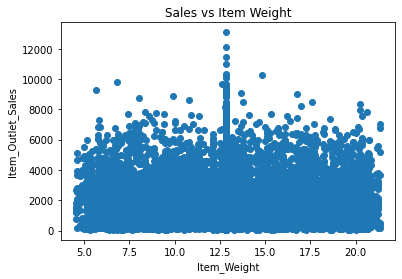

In [28]:
plt.scatter(final_data.Item_Weight, final_data.Item_Outlet_Sales)
plt.title('Sales vs Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

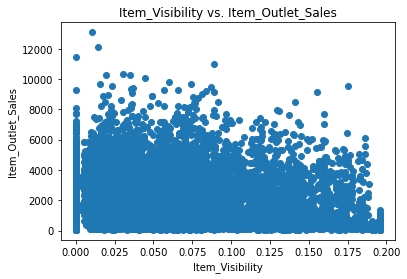

In [29]:
plt.scatter(final_data.Item_Visibility, final_data.Item_Outlet_Sales)
plt.title('Item_Visibility vs. Item_Outlet_Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')

#Feature Engineering

In [30]:
final_data=final_data.drop('Item_Identifier',axis=1)

In [31]:
label_encoder = preprocessing.LabelEncoder()
final_data['Item_type']= label_encoder.fit_transform(final_data['Item_Type'])
final_data['Item_Fat_Content']= label_encoder.fit_transform(final_data['Item_Fat_Content'])
final_data['Outlet_Type']= label_encoder.fit_transform(final_data['Outlet_Type'])
final_data['Outlet_Size']= label_encoder.fit_transform(final_data['Outlet_Size'])
final_data['Outlet_Location_Type']= label_encoder.fit_transform(final_data['Outlet_Location_Type'])

In [32]:
final_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_type
0,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,4
1,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,14
2,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,10
3,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,6
4,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,9


In [33]:
final_data= pd.get_dummies(final_data,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
final_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_type,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0.016047,249.8092,OUT049,1999,3735.1380,4,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,OUT018,2009,443.4228,14,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,OUT049,1999,2097.2700,10,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,OUT010,1998,732.3800,6,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,OUT013,1987,994.7052,9,0,1,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,OUT013,1987,2778.3834,13,0,1,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,OUT045,2002,549.2850,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,OUT035,2004,1193.1136,8,0,1,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,OUT018,2009,1845.5976,13,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [34]:
final_data.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [35]:
final_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_type,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.016047,249.8092,1999,3735.1380,4,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,14,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,10,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,6,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,9,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [36]:
final_data.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_type                            int64
Item_Fat_Content_0                   uint8
Item_Fat_Content_1                   uint8
Item_Fat_Content_2                   uint8
Item_Fat_Content_3                   uint8
Item_Fat_Content_4                   uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_S

In [37]:
X = final_data.drop('Item_Outlet_Sales',axis=1)
y = final_data['Item_Outlet_Sales']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
X.head()
y
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6818, 36)
(1705, 36)
(6818,)
(1705,)


#linear regression 


In [38]:
model = LinearRegression()

In [39]:
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(f"predicted response:\n{ypred}")

predicted response:
[-415.63777404 2827.75756301  677.7930449  ... 3572.54977336 2351.98331836
 1778.03613275]


In [40]:
mse = mean_squared_error(ytest, ypred)
print("r2 score",r2_score(ytest,ypred))
print("model score%.2f" %model.score(xtrain, ytrain))
print("mse ",mse)

r2 score 0.574788509396634
model score0.56
mse  1210981.9371333744


#random forest 

In [41]:
model= RandomForestRegressor()

In [42]:
model.fit(xtrain,ytrain)
ypred= model.predict(xtest)
print("predicted response:\n{ypred}")

predicted response:
{ypred}


In [43]:
mse = mean_squared_error(ytest, ypred)
r2=r2_score(ytest,ypred)
print("r2 score",r2)
print("model score%.2f" %model.score(xtrain, ytrain))
print("mse ",mse)

r2 score 0.5632792797190143
model score0.94
mse  1243759.6714089462
